# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
headers = ['sample','ClumpThickness','CellSize','CellShape','MarginalAdhesion','Single EpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','Class']
data = pd.read_csv('breast-cancer-wisconsin.csv' , names=headers)
data.columns

Index(['sample', 'ClumpThickness', 'CellSize', 'CellShape', 'MarginalAdhesion',
       'Single EpithelialCellSize', 'BareNuclei', 'BlandChromatin',
       'NormalNucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [3]:
data.head(10)

,sample,ClumpThickness,CellSize,CellShape,MarginalAdhesion,Single EpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
data.dtypes

sample                        int64
ClumpThickness                int64
CellSize                      int64
CellShape                     int64
MarginalAdhesion              int64
Single EpithelialCellSize     int64
BareNuclei                   object
BlandChromatin                int64
NormalNucleoli                int64
Mitoses                       int64
Class                         int64
dtype: object

In [6]:
data.shape

(699, 11)

In [7]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sample,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
CellSize,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
CellShape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
MarginalAdhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single EpithelialCellSize,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
BlandChromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
NormalNucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [9]:
data.isna().values.any()


False

In [10]:
data.isnull().values.any()

False

In [11]:
wrong = data.loc[data['BareNuclei'] == '?']
wrong.shape

(16, 11)

In [12]:
#We can find some 16 records having '?' for Bare Nuclei

In [13]:
data.BareNuclei.replace(to_replace='?',value=data.BareNuclei[data.BareNuclei != '?'].median(),inplace=True)

In [14]:
data.isna().values.any()

False

In [15]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [16]:
data.isnull().values.any()

False

In [17]:
data['BareNuclei'] = data['BareNuclei'].astype('int64')

In [18]:
data.dtypes

sample                       int64
ClumpThickness               int64
CellSize                     int64
CellShape                    int64
MarginalAdhesion             int64
Single EpithelialCellSize    int64
BareNuclei                   int64
BlandChromatin               int64
NormalNucleoli               int64
Mitoses                      int64
Class                        int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [19]:
# Check for correlation of variable
data.corr()

,sample,ClumpThickness,CellSize,CellShape,MarginalAdhesion,Single EpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
sample,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
CellSize,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
CellShape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
MarginalAdhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single EpithelialCellSize,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
BareNuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
BlandChromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
NormalNucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [20]:
data.corr().abs().unstack().sort_values(ascending= False).drop_duplicates() 

Class                      Class                        1.000000
CellSize                   CellShape                    0.906882
BareNuclei                 Class                        0.818968
CellShape                  Class                        0.818934
CellSize                   Class                        0.817904
Class                      BlandChromatin               0.756616
BlandChromatin             CellSize                     0.755721
Single EpithelialCellSize  CellSize                     0.751799
CellShape                  BlandChromatin               0.735948
CellSize                   NormalNucleoli               0.722865
CellShape                  Single EpithelialCellSize    0.719668
                           NormalNucleoli               0.719446
Class                      ClumpThickness               0.716001
                           NormalNucleoli               0.712244
BareNuclei                 CellShape                    0.707474
MarginalAdhesion         

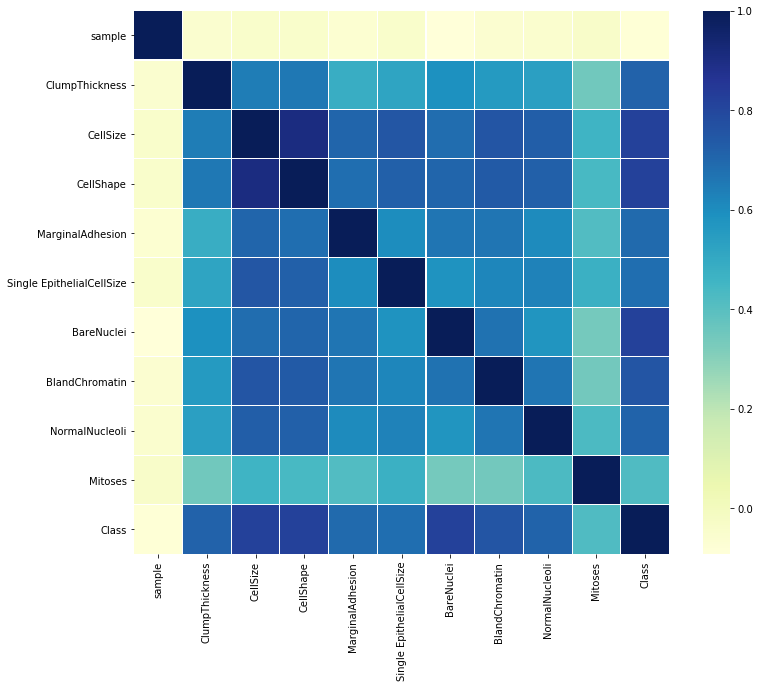

In [21]:
corrmat = data.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1,cbar=True)

In [22]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\hp\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


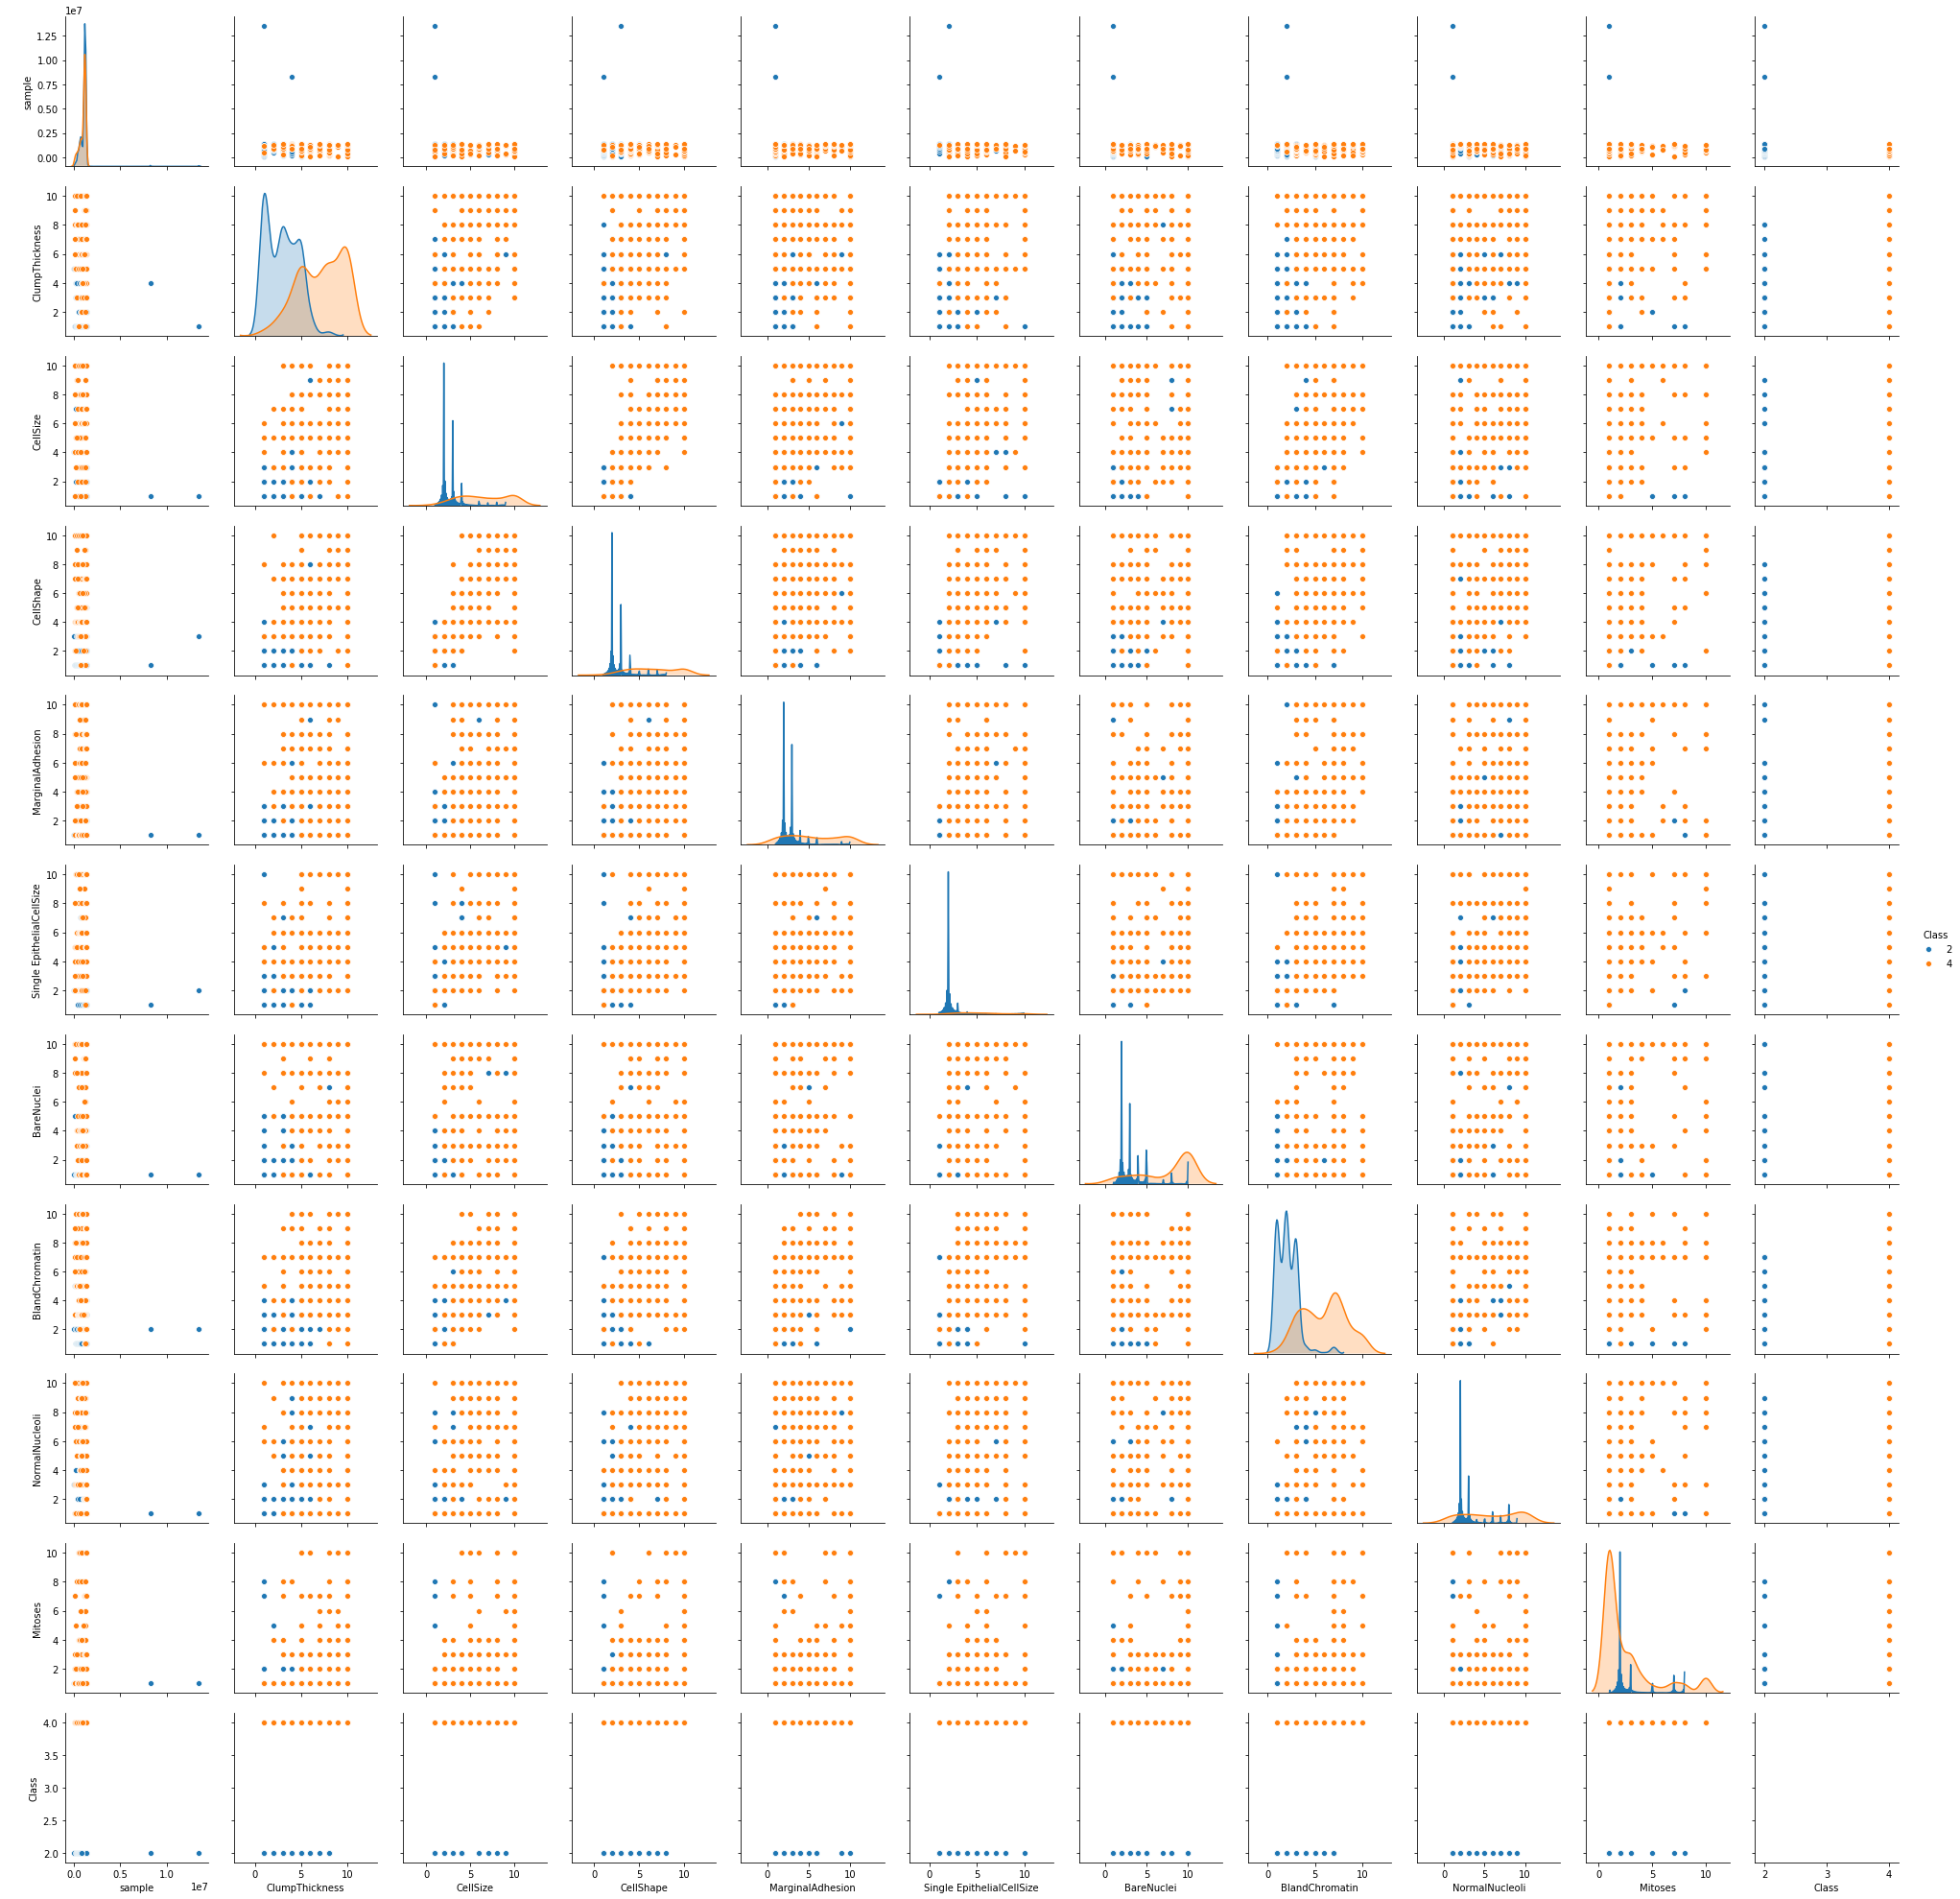

In [23]:
#Let us check for pair plots
sns.pairplot(data , hue='Class')

In [24]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [25]:
# We could see most of the outliers are now removed.

In [26]:
# cell size and cell shape are seems to be highly correlated do we can drop cell shape

In [27]:
data = data.drop('sample' , axis=1)

In [28]:
data.head()

,ClumpThickness,CellSize,CellShape,MarginalAdhesion,Single EpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [29]:
from scipy.stats import zscore
data_labelled = data.iloc[:,0:9].apply(zscore)
data_labelled['Class'] = data['Class']
data_labelled.head()


,ClumpThickness,CellSize,CellShape,MarginalAdhesion,Single EpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,2
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912,2
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912,2
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912,2
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,2


In [30]:
from sklearn.preprocessing import StandardScaler
X =  data.drop(['Class'], axis=1)
Y =  data["Class"]
sc=StandardScaler()
X_std=sc.fit_transform(X)

C:\Users\hp\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q6 Create a covariance matrix for identifying Principal components

In [31]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.5908535
  0.5592282  0.53660222 0.35053534]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.68765657
  0.75680368 0.72390044 0.4593503 ]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.70848734
  0.73700282 0.72047704 0.43953974]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.66792658
  0.66767051 0.60421681 0.41823111]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.5845377
  0.61698451 0.62978166 0.47978787]
 [0.5908535  0.68765657 0.70848734 0.66792658 0.5845377  1.00143266
  0.67518063 0.5756016  0.34288766]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 0.67518063
  1.00143266 0.66683179 0.34466258]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.5756016
  0.66683179 1.00143266 0.42894941]
 [0.35053534 0.4593503  0.43953974 0.41823111 0.47978787 0.34288766
  0.34466258 0.42894941 1.00143266]]


In [32]:
cov_matrix.shape

(9, 9)

# Q7 Identify eigen values and eigen vector

In [33]:
# Step 2- Get eigen values and eigen vector

In [34]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [35]:
eig_vals

array([5.8985519 , 0.77588307, 0.53960155, 0.08894898, 0.46640555,
       0.38101776, 0.26233452, 0.30405592, 0.29609474])

In [36]:
eig_vecs

array([[-0.30280515,  0.14602888, -0.86221719,  0.0014072 , -0.08821658,
         0.07192848,  0.24081701,  0.26946934, -0.00131277],
       [-0.38119012,  0.04956364,  0.01909154,  0.73568065,  0.2026394 ,
        -0.13735749, -0.44088652,  0.1000979 ,  0.21521315],
       [-0.37757351,  0.08526953, -0.0345843 , -0.66537497,  0.17515522,
        -0.10469081, -0.58600968,  0.03200191,  0.14204379],
       [-0.33282286,  0.04471887,  0.42144828, -0.04671812, -0.4703171 ,
         0.03462797,  0.11866965,  0.68083355, -0.0861038 ],
       [-0.33639134, -0.16403795,  0.11010437, -0.06786939,  0.37332927,
        -0.68258246,  0.45057208, -0.03559797, -0.18337725],
       [-0.33349748,  0.2477099 , -0.00367104,  0.07339423, -0.5431767 ,
        -0.1275059 , -0.10299896, -0.57486596, -0.41187463],
       [-0.3459564 ,  0.22994199,  0.19744944, -0.05881119, -0.00698988,
         0.25519148,  0.40975993, -0.31459721,  0.67301535],
       [-0.33584019, -0.02502678,  0.13164974,  0.01889835,  0

# Q8 Find variance and cumulative variance by each eigen vector

In [37]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print('Variance', var_exp)


Variance [65.44570379762203, 8.608589755529703, 5.9869954739199205, 5.174870041863311, 4.227474060797526, 3.373565908122156, 3.285234873047386, 2.910658031149291, 0.9869080579486815]


In [38]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 65.4457038   74.05429355  80.04128903  85.21615907  89.44363313
  92.81719904  96.10243391  99.01309194 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [39]:
X_centered = X - X.mean(axis=0)

In [40]:
pca = PCA(n_components=9)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
X_pca = pca.transform(X_centered)

In [42]:
X_pca.shape

(699, 9)

# Q10 Find correlation between components and features

In [43]:
pca.components_

array([[ 0.2983261 ,  0.40439054,  0.39224516,  0.33155363,  0.25000985,
         0.43971674,  0.29212756,  0.35663675,  0.12370014],
       [-0.06201421,  0.2264635 ,  0.16441813, -0.09978919,  0.18417043,
        -0.78618671,  0.01476453,  0.4789494 ,  0.16204477],
       [-0.84870565, -0.02546854, -0.07517707,  0.48286957,  0.04907438,
         0.08447575,  0.10830834,  0.13315283,  0.03508036],
       [ 0.06534325,  0.28496176,  0.19835691,  0.39844272,  0.19968275,
        -0.30713642, -0.04657243, -0.74476283,  0.15930581],
       [-0.40932322,  0.34595861,  0.38210846, -0.63456569,  0.19340991,
         0.16587589,  0.08070772, -0.2099911 , -0.22035073],
       [-0.07699746, -0.09420965, -0.09446697, -0.1885437 ,  0.40559877,
         0.23024765, -0.47383441,  0.02554583,  0.70571044],
       [-0.02651537,  0.17476917,  0.34013253,  0.19196921, -0.27907667,
         0.05316947, -0.79645332,  0.1510127 , -0.27992292],
       [ 0.09155611, -0.12540484, -0.24132109,  0.10620924,  0

In [44]:
col_names = ['ClumpThickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion',
      'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Normal_Nucleoli',
      'Bland_Chromatin', 'Mitoses']
df_new = pd.DataFrame(pca.components_,columns=col_names)
corr_df = df_new.corr()
corr_df

,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses
ClumpThickness,1.000000,0.282027,0.045502,0.062669,0.221609,-0.008634,-0.129703,0.030512,0.013494
Cell_Size,0.282027,1.000000,-0.111624,-0.153738,-0.543643,0.021182,0.318183,-0.074852,-0.033102
Cell_Shape,0.045502,-0.111624,1.000000,-0.024804,-0.087711,0.003417,0.051335,-0.012077,-0.005341
Marginal_Adhesion,0.062669,-0.153738,-0.024804,1.000000,-0.120803,0.004707,0.070703,-0.016633,-0.007356
Single_Epithelial_Cell_Size,0.221609,-0.543643,-0.087711,-0.120803,1.000000,0.016644,0.250019,-0.058816,-0.026011
Bare_Nuclei,-0.008634,0.021182,0.003417,0.004707,0.016644,1.000000,-0.009741,0.002292,0.001013
Normal_Nucleoli,-0.129703,0.318183,0.051335,0.070703,0.250019,-0.009741,1.000000,0.034424,0.015224
Bland_Chromatin,0.030512,-0.074852,-0.012077,-0.016633,-0.058816,0.002292,0.034424,1.000000,-0.003581
Mitoses,0.013494,-0.033102,-0.005341,-0.007356,-0.026011,0.001013,0.015224,-0.003581,1.000000


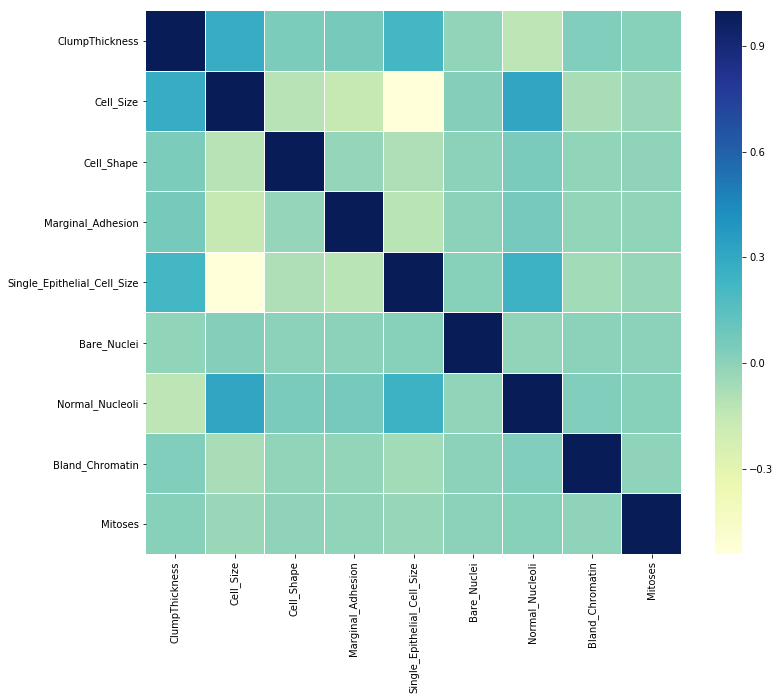

In [45]:
corrmat = df_new.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1,cbar=True)

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [46]:
df = pd.read_excel('jokes.xlsx')
df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [47]:
rating=df.head(n=200)

In [48]:
rating.drop(rating.columns[0],axis=1,inplace=True)
rating.head()

C:\Users\hp\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [49]:
rating.columns = range(rating.shape[1])
rating.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [50]:
rating.replace(99.00,0).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
ratings_diff = scaler.fit_transform(rating)
ratings_diff

array([[-0.83401707, -0.26302556, -0.9426833 , ...,  0.70778183,
         0.7894014 ,  0.70807651],
       [-0.5697436 , -0.49904647, -0.60368031, ..., -1.40370926,
        -1.3580697 , -1.41633091],
       [ 1.5382259 ,  2.08184746,  1.35669652, ...,  0.70778183,
         0.7894014 ,  0.70807651],
       ...,
       [-0.60216707, -0.5900237 , -0.76302442, ..., -1.42660908,
        -1.25310717, -1.42999758],
       [ 1.5382259 ,  2.08184746,  1.35669652, ...,  0.70778183,
         0.7894014 ,  0.70807651],
       [-0.53643182, -0.68074099, -0.834761  , ...,  0.70778183,
         0.7894014 ,  0.70807651]])

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [53]:
final=pd.DataFrame(ratings_diff.mean(axis = 0))

In [54]:
final.head()

,0
0,-3.996803e-17
1,-6.661338e-17
2,-5.995204e-17
3,1.243450e-16
4,-2.220446e-18


In [55]:
final.sort_values(by=[0],ascending=False).head(n=10)

,0
78,2.575717e-16
73,2.131628e-16
70,1.865175e-16
97,1.598721e-16
95,1.332268e-16
3,1.243450e-16
88,1.154632e-16
87,1.065814e-16
11,9.769963e-17
84,9.769963e-17
